In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('train.csv', header=0)
df_label = df['label']
df = df.drop('label', axis=1)
df.head()

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         0  
1         0         0         0         0         0  
2         0         0         0         0         0  
3         0         0         0         0         0  
4         0         0         0         0         0  

[5 rows x 784 columns]

6768


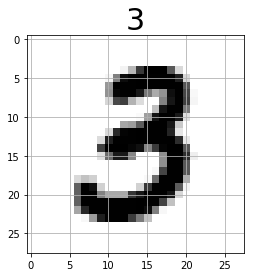

In [3]:
r = np.random.randint(len(df.index))
print(r)
imgshow = plt.imshow(df.iloc[r].values.reshape(28,28), cmap='gray_r')
plt.title(df_label[r], fontsize=30)
plt.grid()
plt.show()

In [4]:
lr = LogisticRegression()

In [5]:
df_train, df_test, label_train, label_test = train_test_split(df, df_label, test_size=0.33, random_state=42)

In [6]:
lr.fit(df_train.values/255, label_train.values)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [7]:
prediction = lr.predict(df_test.values/255)

In [8]:
from sklearn.metrics import accuracy_score

In [9]:
accuracy_score(prediction,label_test.values)

0.91479076479076482

In [10]:
df_test2 = pd.read_csv('test.csv', header=0)
df_test2.head()

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         0  
1         0         0         0         0         0  
2         0         0         0         0         0  
3         0         0         0         0         0  
4         0         0         0         0         0  

[5 rows x 784 columns]

In [11]:
prediction2 = lr.predict(df_test2.values/255)

In [12]:
df_output = pd.DataFrame({
    'ImageId' : df_test2.index.values+1,
    'label': prediction2
})

In [13]:
df_output.to_csv("/home/zectrosan/Documents/python/data/MNIST/output_lr.csv", sep=',')